# Basic EDA Regression and Classification Models (100% accuracy)

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from sklearn import linear_model
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import preprocessing

warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Lets just drop the Serial number column as it's unnecessary

In [4]:
data.drop("Serial No.", axis=1, inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Exploring the distribution of features

Average GRE Score: 316


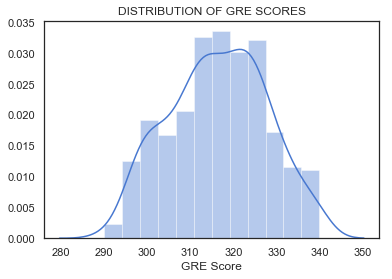


Average TOEFL Score: 107


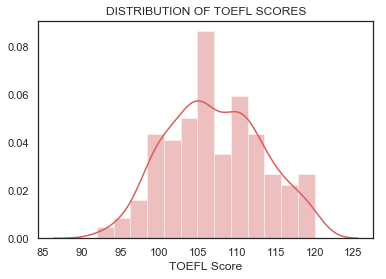


Average CGPA: 8


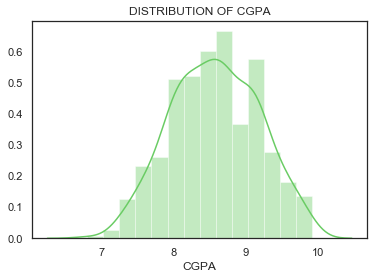

Distribution Of University Ratings


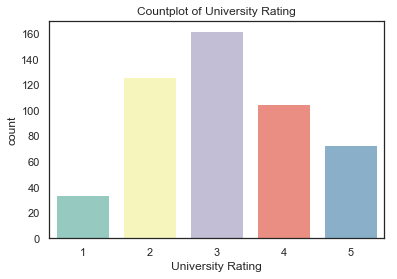

Distribution Of SOP vs LOR


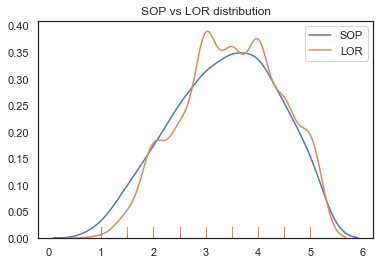

In [279]:
print("Average GRE Score:", int(data['GRE Score'].mean()))
plt.title("DISTRIBUTION OF GRE SCORES")
sns.distplot(data['GRE Score'])
plt.show()

print("\nAverage TOEFL Score:", int(data['TOEFL Score'].mean()))
plt.title("DISTRIBUTION OF TOEFL SCORES")
sns.distplot(data['TOEFL Score'],color = 'r')
plt.show()

print("\nAverage CGPA:", int(data['CGPA'].mean()))
plt.title("DISTRIBUTION OF CGPA")
sns.distplot(data['CGPA'],color = 'g')
plt.show()

print("Distribution Of University Ratings")
plt.title("Countplot of University Rating")
sns.countplot(x="University Rating", data=data, palette="Set3")
plt.show()

print("Distribution Of SOP vs LOR")
plt.title("SOP vs LOR distribution")
sns.distplot(data[['SOP']], hist=False, rug=True,label ='SOP')
sns.distplot(data[['LOR ']], hist=False, rug=True,label ='LOR')
plt.show()

### Impact of Research on University Ratings and Test scores 

Students with research history tend to get higher scores in tests and get into high rated universities (as expected)

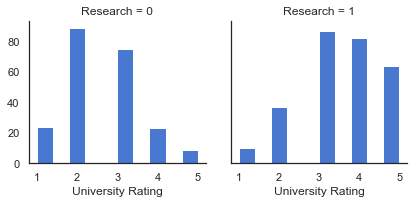

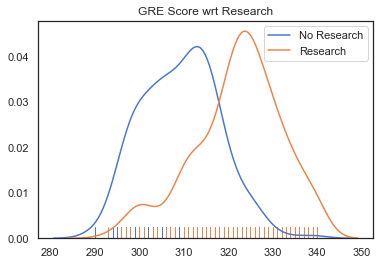

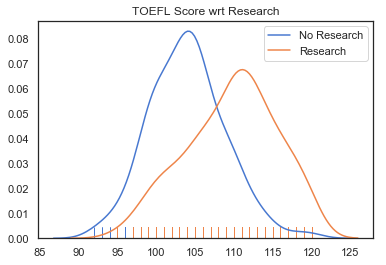

In [74]:
g = sns.FacetGrid(data, col="Research")
g.map(plt.hist, "University Rating");
plt.show()


target_0 = data.loc[data['Research'] == 0]
target_1 = data.loc[data['Research'] == 1]
plt.title("GRE Score wrt Research")
sns.distplot(target_0[['GRE Score']], hist=False, rug=True,label ='No Research')
sns.distplot(target_1[['GRE Score']], hist=False, rug=True,label ='Research')
plt.show()

plt.title("TOEFL Score wrt Research")
sns.distplot(target_0[['TOEFL Score']], hist=False, rug=True,label ='No Research')
sns.distplot(target_1[['TOEFL Score']], hist=False, rug=True,label ='Research')
plt.show()

### The Factors that affect your Admissions (According to the data)

- GRE and TOEFL Score

- University Rating 

- Your CGPA (ughh)

- Reccomendation Letter and Statement of Purpose

- Research

Lets see how much each of them affect your chances


### Order of Feature correlation with chance of admission

1. CGPA
2. GRE
3. TOEFL 
4. Rating 
5. SOP
6. LOR
7. Research

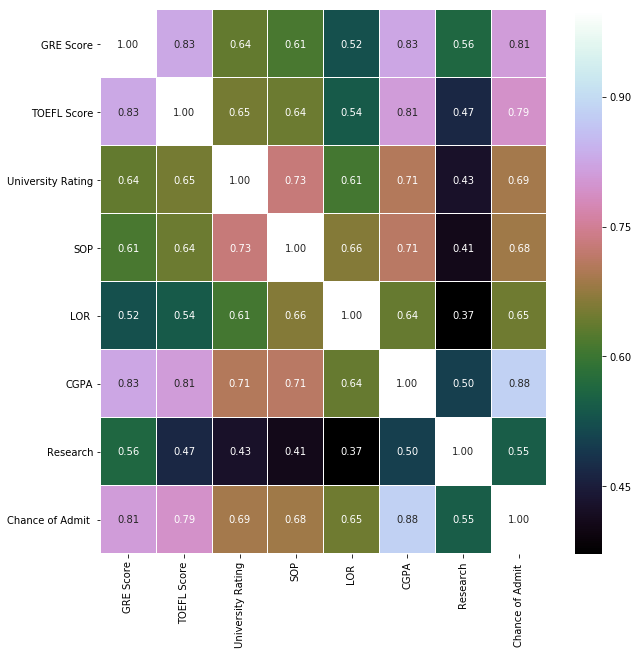

In [27]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="cubehelix")
plt.show()

### Does CGPA matter that much tho ?

Looks like it does matter...very much so

<Figure size 432x288 with 0 Axes>

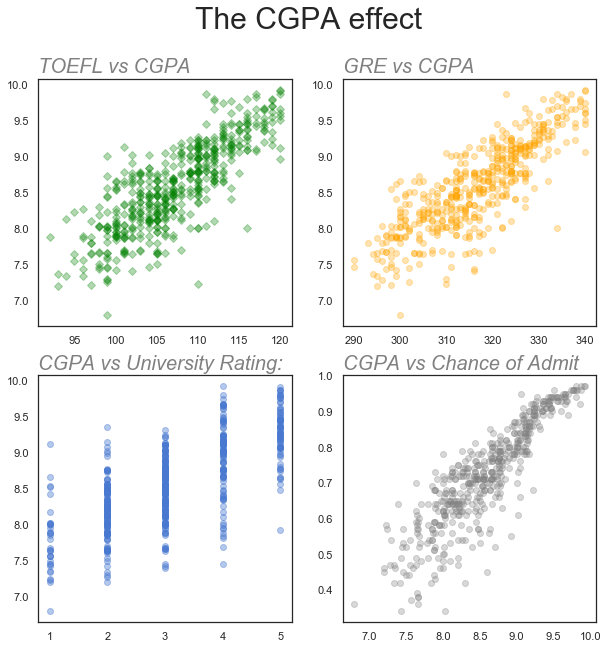

In [274]:
fig=plt.figure()
 
plt.subplots(figsize=(10, 10))
# Do a 2x2 chart
plt.subplot(221)
plt.plot( 'TOEFL Score','CGPA', data=data, linestyle='none', marker='D', color="green", alpha=0.3)
plt.title('TOEFL vs CGPA', fontsize=20, color='grey', loc='left', style='italic')

plt.subplot(222)
plt.plot( 'GRE Score', 'CGPA', data=data, linestyle='none', marker='o', color="orange", alpha=0.3)
plt.title('GRE vs CGPA', fontsize=20, color='grey', loc='left', style='italic')

plt.subplot(223)
plt.plot('University Rating', 'CGPA', data=data, linestyle='none',marker='o', alpha=0.4)
plt.title('CGPA vs University Rating:', fontsize=20, color='grey', loc='left', style='italic')

plt.subplot(224)
plt.plot('CGPA', 'Chance of Admit ', data=data,linestyle='none', marker='o', color="grey", alpha=0.3)
plt.title('CGPA vs Chance of Admit', fontsize=20, color='grey', loc='left', style='italic')
 
# Add a title:
plt.suptitle('The CGPA effect',fontsize = 30)
plt.show()

### Building Regression Models

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Chance of Admit ',axis=1), 
                 data['Chance of Admit '], test_size=0.33, random_state=42)

Mean Squared Error for Ridge Regression:  0.0036211301594659497


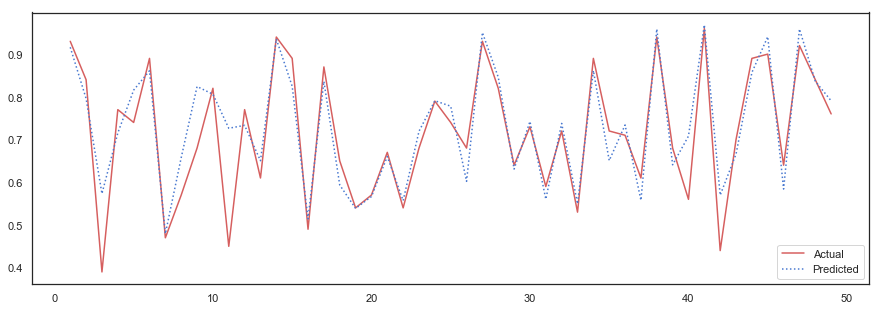

In [200]:
### Ridge Regression
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,y_train)
pred_ridge=reg.predict(X_test)
print("Mean Squared Error for Ridge Regression: ",mean_squared_error(y_test,pred_ridge))

plt.figure(figsize=(15,5))
x = np.arange(1,50)
plt.plot(x,y_test[:49], '-g', label='Actual',color ='r')
plt.plot(x, pred_ridge[:49], ':b', label='Predicted')
plt.legend();

In [201]:
#### Ridge regression with built-in cross-validation of the alpha parameter
reg =linear_model.RidgeCV(alphas=[0.001,0.01,0.1,1.0,10.0], cv=5)
reg.fit(X_train,y_train)
pred1=reg.predict(X_test)
print("Mean Squared Error for Bayesian Regression: ",mean_squared_error(y_test,pred1))

Mean Squared Error for Bayesian Regression:  0.0036212892226798288


In [196]:
### Bayesian ridge, Lasso Model and ARDRegression

reg = linear_model.BayesianRidge()
reg.fit(X_train,y_train)
pred1=reg.predict(X_test)
print("Mean Squared Error for Bayesian Regression: ",mean_squared_error(y_test,pred1))

reg = linear_model.Lasso(alpha=0.001)
reg.fit(X_train,y_train)
pred1=reg.predict(X_test)
print("Mean Squared Error for Lasso Regression: ",mean_squared_error(y_test,pred1))

reg = linear_model.ARDRegression()
reg.fit(X_train,y_train)
pred1=reg.predict(X_test)
print("Mean Squared Error for ADRRegression: ",mean_squared_error(y_test,pred1))

Mean Squared Error for Bayesian Regression:  0.003624953938095638
Mean Squared Error for Lasso Regression:  0.0036938121455845022
Mean Squared Error for ADRRegression:  0.003835196154893947


Mean Squared Error for KNN 0.005470583164983165


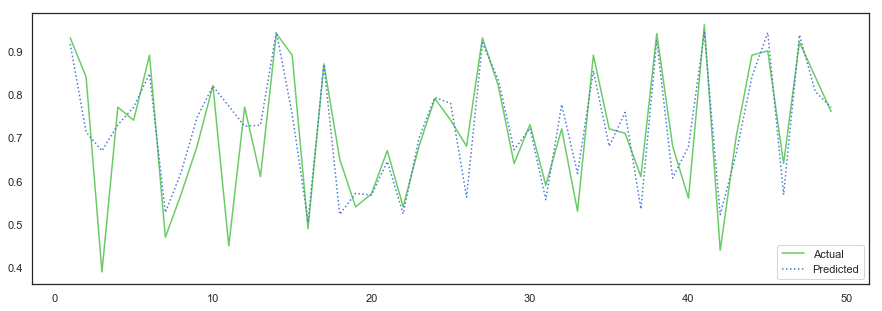

In [202]:
## KNN Regression
n_neighbors= 15 #Decided After lil Gridsearch of different N values
reg=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
reg.fit(X_train,y_train)
pred_knn=reg.predict(X_test)
print("Mean Squared Error for KNN", mean_squared_error(y_test,pred_knn))

plt.figure(figsize=(15,5))
x = np.arange(1,50)
plt.plot(x,y_test[:49], '-g', label='Actual',color ='g')
plt.plot(x, pred_knn[:49], ':b', label='Predicted')
plt.legend();

Mean Squared Error for Decision Trees:  0.005124786915885368


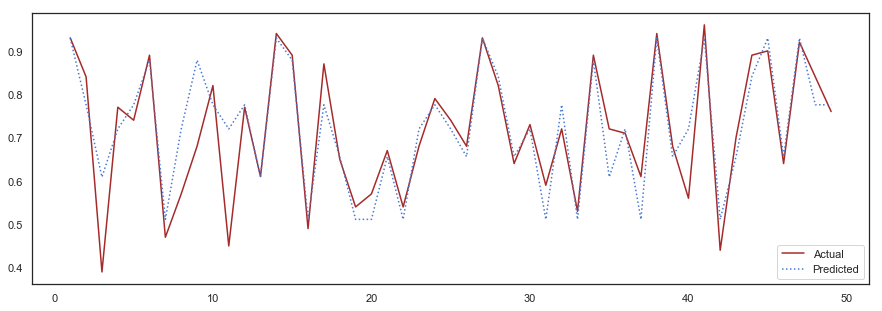

In [203]:
## Decision Tree Regression
all_mse = []
for i in range(1,100):
    reg = tree.DecisionTreeRegressor(max_depth=i)
    reg.fit(X_train,y_train)
    pred1=reg.predict(X_test)
    all_mse.append(mean_squared_error(y_test,pred1))
    
best_max_depth = all_mse.index(min(all_mse))
reg = tree.DecisionTreeRegressor(max_depth=best_max_depth)
reg.fit(X_train,y_train)
pred_tree=reg.predict(X_test)
print("Mean Squared Error for Decision Trees: ",mean_squared_error(y_test,pred_tree))

plt.figure(figsize=(15,5))
x = np.arange(1,50)
plt.plot(x,y_test[:49], '-g', label='Actual',color ='brown')
plt.plot(x, pred_tree[:49], ':b', label='Predicted')
plt.legend();

In [204]:
reg=svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
reg.fit(X_train,y_train)
pred_svm=reg.predict(X_test)
print("Mean Squared Error for SVM", mean_squared_error(y_test,pred_svm))

Mean Squared Error for SVM 0.008185483970307156


### Comparing the different used Models

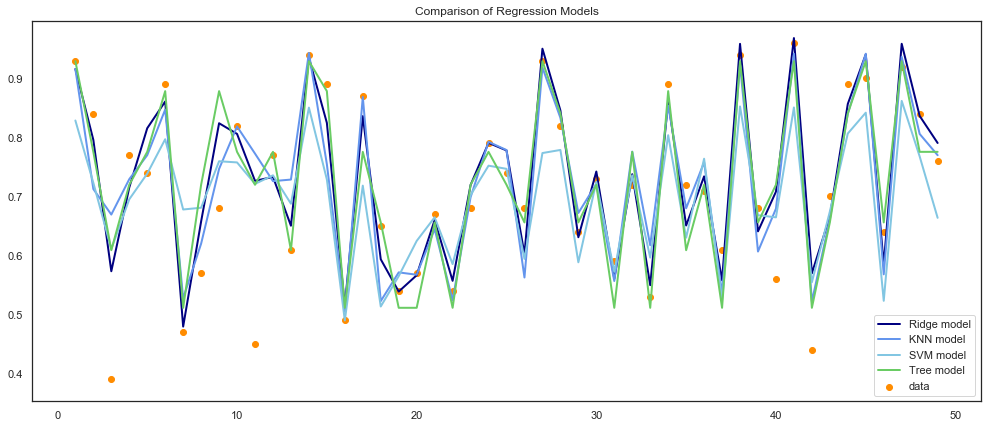

In [217]:
lw = 2
plt.figure(figsize=(17,7))
plt.scatter(x, y_test[:49], color='darkorange', label='data')
plt.plot(x, pred_ridge[:49], color='navy', lw=lw, label='Ridge model')
plt.plot(x, pred_knn[:49], color='cornflowerblue', lw=lw, label='KNN model')
plt.plot(x, pred_svm[:49], color='c', lw=lw, label='SVM model')
plt.plot(x, pred_tree[:49], color='g', lw=lw, label='Tree model')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()

### Lets Convert this into a classification Problem 

Let 80% be the threshold for Admission

In [292]:
data['admission'] = data['Chance of Admit '] 
data.admission[data.admission >=0.8] = 1 
data.admission[data.admission <0.8 ] = 0

In [294]:
df = data.drop('Chance of Admit ',axis=1)

## WOAH WOAH HOLD UP AND CHECK THIS OUT !!!!!!!!!!

## WE ARE GETTING 100% Accuracy in the test set 

In [296]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('admission',axis=1), 
                 data['admission'], test_size=0.33, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
prediction=nb.predict(X_test)
print("F1 SCORE for Naive Bayes:",metrics.f1_score(y_test, prediction, average='weighted'))

clf = LogisticRegression(random_state=0, multi_class='ovr')
model = clf.fit(X_train, y_train)
prediction=model.predict(X_test)
print("F1 SCORE for Logistic Regression:",metrics.f1_score(y_test, prediction, average='weighted'))

decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
prediction=decisiontree.predict(X_test)
print("F1 SCORE For Decision Trees:",metrics.f1_score(y_test, prediction, average='weighted'))

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
prediction=neigh.predict(X_test)
print("F1 SCORE for KNN:",metrics.f1_score(y_test, prediction, average='weighted'))

randomforest=RandomForestClassifier(n_estimators =100)
randomforest.fit(X_train, y_train)
prediction=randomforest.predict(X_test)
print("F1 SCORE for Random Forest:",metrics.f1_score(y_test, prediction, average='weighted'))

F1 SCORE for Naive Bayes: 0.9404216073781292
F1 SCORE for Logistic Regression: 0.9397662522662523
F1 SCORE For Decision Trees: 1.0
F1 SCORE for KNN: 0.9041733307743158
F1 SCORE for Random Forest: 1.0


In [ ]:
data = pd.read_csv('../input/Admission_Predict.csv')